![Credit Score Concept – Loan Status Classification](https://www.nfcc.org/wp-content/uploads/2020/09/bigstock-Credit-Score-Concept-Business-384487778.jpg)

# Second Model: Loan Status Classification

## 🎯 Objective
This model predicts whether a loan application will be **approved** or **rejected** (binary classification) based on the applicant’s demographic and financial features plus the credit score predicted by the first model.

---

## 📊 Dataset
- **Source**: `loan_data.csv`  
- **Total samples**: _XX,XXX_  
- **Target variable**: `loan_status` (`Yes` = approved, `No` = rejected)  
- **Train/Test split**: 80% train / 20% test (`random_state=42`)

---

## 🔍 Features

| Type          | Feature Name                       | Description                                       |
|---------------|------------------------------------|---------------------------------------------------|
| **Numeric**   | `person_age`                       | Applicant’s age                                   |
| **Numeric**   | `person_income`                    | Annual income (USD)                               |
| **Numeric**   | `person_emp_exp`                   | Years of employment                               |
| **Numeric**   | `loan_amnt`                        | Requested loan amount                             |
| **Numeric**   | `loan_int_rate`                    | Interest rate (%)                                 |
| **Numeric**   | `loan_percent_income`              | Loan amount as a percentage of income             |
| **Numeric**   | `cb_person_cred_hist_length`       | Length of credit history (years)                  |
| **Numeric**   | `credit_score`                     | Credit score predicted by the first model         |
| **Categorical** | `person_gender`                  | Gender (`female` / `male`)                        |
| **Categorical** | `person_education`               | Education level (`High School`, `Bachelor`, etc.) |
| **Categorical** | `person_home_ownership`          | Home ownership status (`RENT`, `OWN`, etc.)       |
| **Categorical** | `loan_intent`                    | Purpose of loan (`PERSONAL`, `EDUCATION`, etc.)   |
| **Categorical** | `previous_loan_defaults_on_file` | Prior default flag (`Yes` / `No`)                 |

---

# 🎯Import of necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
data = pd.read_csv("loan_data.csv")
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
loan_status_data = data[['credit_score', 'loan_status',]]
loan_status_data

,credit_score,loan_status
0,561,1
1,504,0
2,635,1
3,675,1
4,586,1
...,...,...
44995,645,1
44996,621,1
44997,668,1
44998,604,1


## ☢ Data set imbalance exists
* **35000 == 0 -> cannot use credit**
* **10000 == 1 -> credit available**

In [4]:
loan_status_data["loan_status"].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [5]:
X = loan_status_data.drop('loan_status', axis=1)
y = loan_status_data['loan_status']

In [6]:
X  #features

,credit_score
0,561
1,504
2,635
3,675
4,586
...,...
44995,645
44996,621
44997,668
44998,604


In [7]:
y 

0        1
1        0
2        1
3        1
4        1
        ..
44995    1
44996    1
44997    1
44998    1
44999    1
Name: loan_status, Length: 45000, dtype: int64

## Train - Test - Split
* **%80 train**
* **%20 Test**

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (36000, 1)
y_train shape: (36000,)
X_test shape: (9000, 1)
y_test shape: (9000,)


In [10]:
X_train

,credit_score
25180,631
12555,659
29153,683
23838,641
35686,706
...,...
11284,559
44732,647
38158,652
860,604


### 🧬 First Simple Model - Model-1 - Classification

In [11]:
#create basic model

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([    
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(X_train,y_train,epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step - accuracy: 0.7762 - loss: 18.8552
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - accuracy: 0.7762 - loss: 0.5342
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - accuracy: 0.7762 - loss: 0.5346
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step - accuracy: 0.7762 - loss: 0.5348
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - accuracy: 0.7762 - loss: 0.5348
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - accuracy: 0.7762 - loss: 0.5347
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - accuracy: 0.7762 - loss: 0.5345
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - accuracy: 0.7762 - loss: 0.5344
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 745us/step - accuracy: 0.7762 - loss: 0.5343
Epoch 10/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step - accuracy: 0.7762 - loss: 0.5342


### Loss - Accuracy

<Axes: >

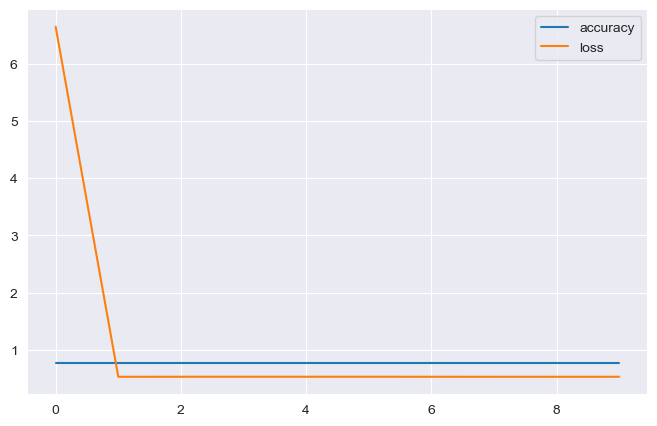

In [12]:
pd.DataFrame(history_1.history).plot(figsize=(8,5))

In [13]:
y_test

37979    0
9911     0
43386    1
13822    0
44810    1
        ..
14572    0
30384    0
36665    0
30569    0
5321     0
Name: loan_status, Length: 9000, dtype: int64

## Model-1 Predict

In [14]:
y_pred_1 = model_1.predict(X_test)
y_preds_1 = (y_pred_1 > 0.5).astype(int)
y_preds_1

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [15]:
model_1.evaluate(X_test,y_test)

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.7656 - loss: 0.5451


[0.5320031642913818, 0.7766666412353516]

### **Confusion Matrix**
![Confusion Matrix – Loan Status Classification](https://th.bing.com/th/id/OIP.4zdxbFqxAooB3EWlEIozjwHaHc?rs=1&pid=ImgDetMain)


In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_preds_1)

array([[6990,    0],
       [2010,    0]])

In [18]:
# Confusion Matrix Function

from sklearn.metrics import confusion_matrix as sk_confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    cm = sk_confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[0,1], yticklabels=[0,1])
    plt.xlabel("Tahmin Edilen")
    plt.ylabel("Gerçek")
    plt.title("Confusion Matrix")
    plt.show()


### Model-1 calculates all the values that it should calculate as '1' as zero.
* insufficient data
* A deeper model may need to be built
* It needs to be normalized data

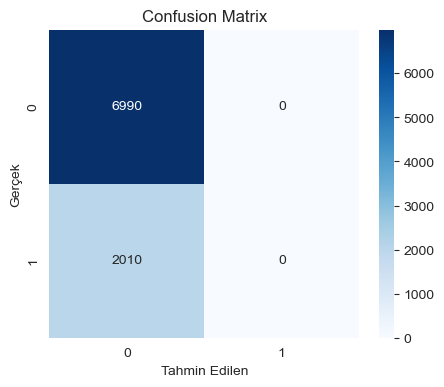

In [19]:
plot_confusion_matrix(y_test,y_preds_1)

### 🧬 Second Simple Model - Model-2 - Classification

In [20]:
#evaluate the model
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(X_train,y_train,epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 749us/step - accuracy: 0.6542 - loss: 14.8484
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - accuracy: 0.7736 - loss: 0.5591
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step - accuracy: 0.7706 - loss: 0.5668
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step - accuracy: 0.7696 - loss: 0.5685
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step - accuracy: 0.7700 - loss: 0.5680
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - accuracy: 0.7705 - loss: 0.5672
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step - accuracy: 0.7713 - loss: 0.5662
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 746us/step - accuracy: 0.7716 - loss: 0.5652
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 739us/step - accuracy: 0.7717 - loss: 0.5642
Epoch 10/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step - accuracy: 0.7717 - loss: 0.5633


<Axes: >

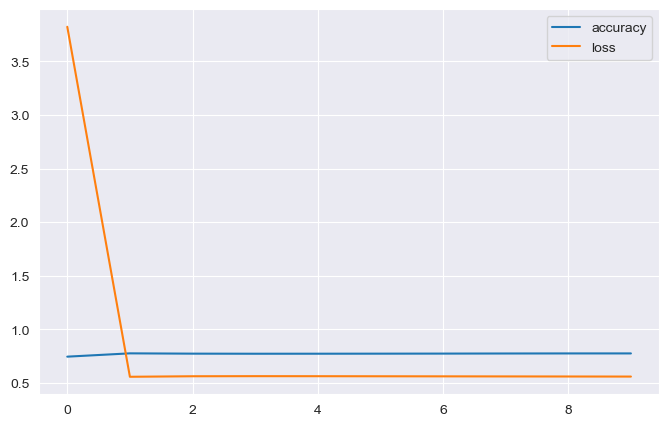

In [21]:
pd.DataFrame(history_2.history).plot(figsize=(8,5))

## Model-2 Predict

In [22]:
y_preds_2 = model_2.predict(X_test)
y_preds_2 = (y_preds_2 > 0.5).astype(int)
y_preds_2

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

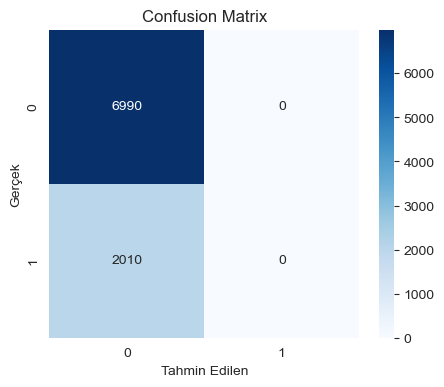

In [23]:
plot_confusion_matrix(y_test,y_preds_2)

### 🧬 Third Model - Model-3 - Classification

In [24]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])

history_3 = model_3.fit(X_train,y_train,epochs=100)

Epoch 1/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 785us/step - accuracy: 0.4211 - loss: 38.0953
Epoch 2/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step - accuracy: 0.7762 - loss: 0.6687
Epoch 3/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 775us/step - accuracy: 0.7762 - loss: 0.6481
Epoch 4/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - accuracy: 0.7762 - loss: 0.6276
Epoch 5/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 775us/step - accuracy: 0.7762 - loss: 0.6090
Epoch 6/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 775us/step - accuracy: 0.7762 - loss: 0.5927
Epoch 7/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - accuracy: 0.7762 - loss: 0.5788
Epoch 8/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step - accuracy: 0.7762 - loss: 0.5672
Epoch 9/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.7762 - loss: 0.5577
Epoch 10/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 788us/step - accuracy: 0.7762 - loss: 0.5502
Epoch 11/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - accuracy: 0.7762 - loss: 0.5

### Class Weight
  * Class weighting is a technique used especially in classification problems with unbalanced classes. Its purpose is to make the model consider minority classes “more important” and penalize errors more severely in these classes.
  * If you have, for example, 90% “negative” examples and 10% “positive” examples, the model can achieve 90% accuracy even by always predicting “negative”.

  * This prevents it from correctly learning the minority class that really matters (e.g. approved customers in a credit situation).

  * Class weight gives different weights to instances of each class when calculating loss during training:

  * Weight for rare classes ↑ ⇒ loss function takes larger penalty when incorrectly predicted

  * Weight for common classes ↓ ⇒ loss function is penalized more lightly when incorrectly estimated

  * Translated with DeepL.com (free version)

In [25]:
from sklearn.utils.class_weight import compute_class_weight

classes = np.array([0,1])
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train.astype(int)
)

class_weight_dict = dict(zip(classes,class_weights))
print(class_weight_dict)

{np.int64(0): np.float64(0.6426276329882185), np.int64(1): np.float64(2.252816020025031)}


### 🧬 Fourth Model - Model-4 - Classification

In [26]:
#set seed
tf.random.set_seed(42)

# create model-4
model_4 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history_4 = model_4.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),class_weight=class_weight_dict)

Epoch 1/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4331 - loss: 0.7211 - val_accuracy: 0.7767 - val_loss: 0.6828
Epoch 2/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step - accuracy: 0.5061 - loss: 0.6956 - val_accuracy: 0.7767 - val_loss: 0.6848
Epoch 3/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 979us/step - accuracy: 0.6652 - loss: 0.6954 - val_accuracy: 0.7767 - val_loss: 0.6887
Epoch 4/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 985us/step - accuracy: 0.6349 - loss: 0.6953 - val_accuracy: 0.7767 - val_loss: 0.6889
Epoch 5/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 971us/step - accuracy: 0.6263 - loss: 0.6953 - val_accuracy: 0.7767 - val_loss: 0.6890
Epoch 6/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 967us/step - accuracy: 0.6262 - loss: 0.6953 - val_accuracy: 0.7767 - val_loss: 0.6890
Epoch 7/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step - accuracy: 0.6262 - loss: 0.6953 - val_accuracy: 0.7767 - val_loss: 0.6889
Epoch 8/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 974us/step - accuracy: 0.

<Axes: >

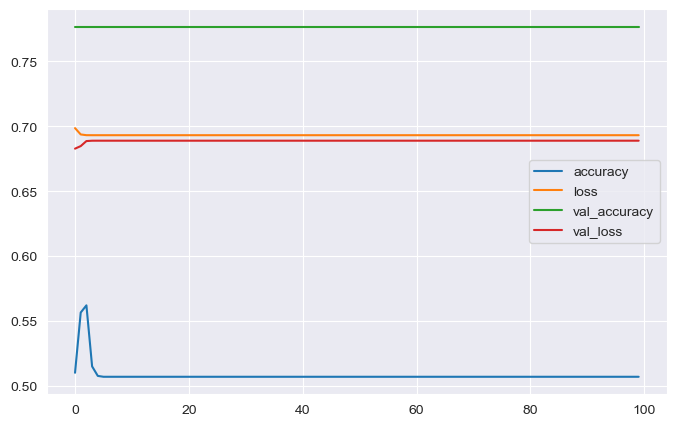

In [27]:
pd.DataFrame(history_4.history).plot(figsize=(8,5))

In [28]:
model_4.evaluate(X_test,y_test)

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.7656 - loss: 0.6891


[0.6889491081237793, 0.7766666412353516]

## Model-4 Predict

In [29]:
y_preds_4 = model_4.predict(X_test)
y_preds_4 = (y_preds_4 > 0.5).astype(int)
y_preds_4

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

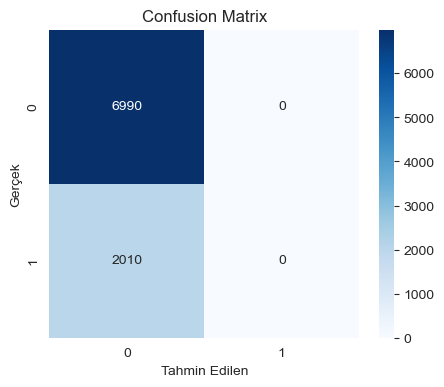

In [30]:
plot_confusion_matrix(y_test,y_preds_4)

## Why Use a Data-Driven Threshold?

We do this to pick a decision threshold that’s **data-driven** rather than arbitrarily fixed at 0.5. The default 0.5 cutoff isn’t always optimal—especially when:

- Your classes are **imbalanced** (very different numbers of positive vs. negative samples).  
- The cost of a **false positive** and a **false negative** aren’t equal.  
- You care more about **sensitivity** (recall) or **specificity** than raw accuracy.  

---

### Youden’s J Statistic

By maximizing Youden’s J statistic:

$$
J(\tau) = \mathrm{TPR}(\tau) - \mathrm{FPR}(\tau)
$$

we find the threshold \(\tau^*\) that best balances true positive rate and false positive rate.

---

### Benefits of an Optimal Threshold

1. **Higher sensitivity** without letting the false‐alarm rate run wild.  
2. **Better trade‐off** given your real‐world costs of misclassification.  
3. **Tailored “approve vs. reject” rule** aligned with your data and business needs.

---

> Selecting the optimal threshold via Youden’s J makes your model’s binary decisions more effective and aligned with practical requirements.


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_curve, auc, confusion_matrix, classification_report
)

clf = LogisticRegression(random_state=42)
clf.fit(X_train,y_train)

y_prob = clf.predict_proba(X_test)[:,1]

fpr,tpr,thresholds = roc_curve(y_test,y_prob)
j_scores = tpr - fpr
best_idx = np.argmax(j_scores)
best_threshold = thresholds[best_idx]
print(f"Best Threshold: {best_threshold:.2f}")


Best Threshold: 0.22


In [32]:
y_pred = (y_prob >= best_threshold).astype(int)
# 5) Performans raporu
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[3644 3346]
 [ 995 1015]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.52      0.63      6990
           1       0.23      0.50      0.32      2010

    accuracy                           0.52      9000
   macro avg       0.51      0.51      0.47      9000
weighted avg       0.66      0.52      0.56      9000



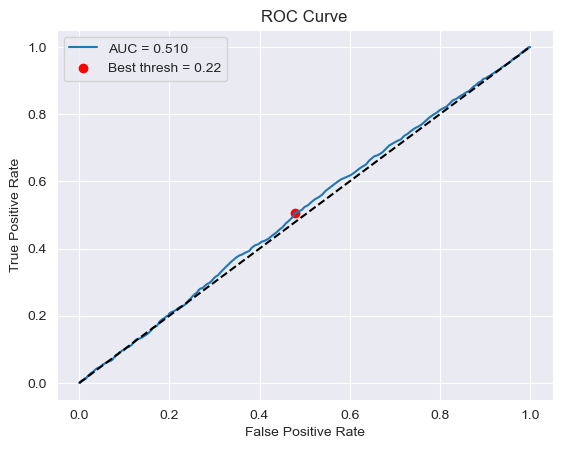

In [33]:
# 6) ROC eğrisini çiz (opsiyonel)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr,tpr):.3f}")
plt.scatter(fpr[best_idx], tpr[best_idx],
            label=f"Best thresh = {best_threshold:.2f}", color='red')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve")
plt.show()

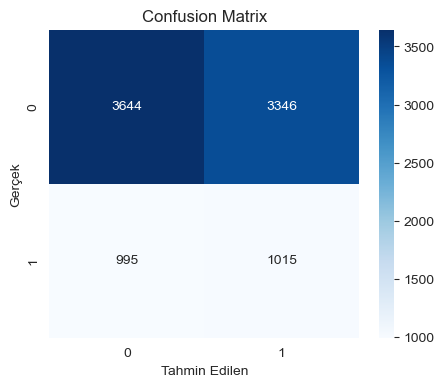

In [34]:
plot_confusion_matrix(y_test,y_pred)

### 🧬 fifth Model - Model-5 - Classification


In [35]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

# Aynı model mimarisiyle
tf.random.set_seed(42)
model_5 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_os = model_5.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_test, y_test)
)


Epoch 1/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7489 - loss: 0.6449 - val_accuracy: 0.7767 - val_loss: 0.5316
Epoch 2/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - accuracy: 0.7762 - loss: 0.5347 - val_accuracy: 0.7767 - val_loss: 0.5316
Epoch 3/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step - accuracy: 0.7762 - loss: 0.5348 - val_accuracy: 0.7767 - val_loss: 0.5315
Epoch 4/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step - accuracy: 0.7762 - loss: 0.5348 - val_accuracy: 0.7767 - val_loss: 0.5315
Epoch 5/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 950us/step - accuracy: 0.7762 - loss: 0.5348 - val_accuracy: 0.7767 - val_loss: 0.5314
Epoch 6/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 942us/step - accuracy: 0.7762 - loss: 0.5347 - val_accuracy: 0.7767 - val_loss: 0.5314
Epoch 7/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step - accuracy: 0.7762 - loss: 0.5346 - val_accuracy: 0.7767 - val_loss: 0.5314
Epoch 8/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - accuracy: 0.7762 - l

<Axes: >

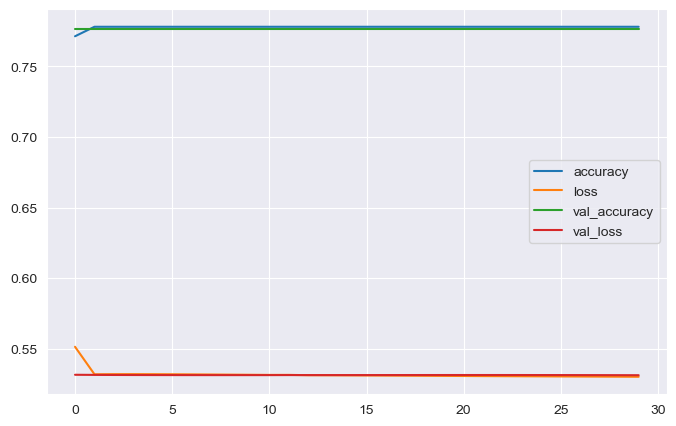

In [36]:
pd.DataFrame(history_os.history).plot(figsize=(8,5))

## Model-5 Predict

In [37]:
y_preds_5 = model_5.predict(X_test)
y_preds_5 = (y_preds_5 > 0.5).astype(int)
y_preds_5

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

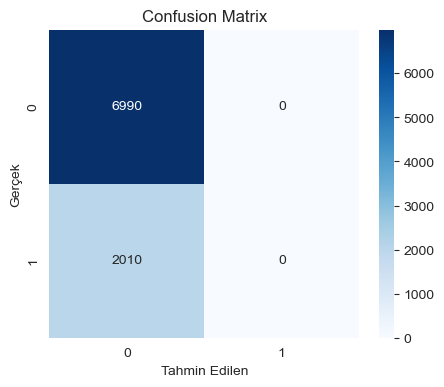

In [38]:
plot_confusion_matrix(y_test,y_preds_5)

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

scaler =MinMaxScaler(feature_range=(0,1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_scaled,y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      6990
           1       0.00      0.00      0.00      2010

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.60      0.78      0.68      9000



C:\Users\kubilay\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kubilay\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kubilay\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 🧬 sixth Model - Model-6 - Classification

In [40]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_6 = model_6.fit(
    X_train_scaled, y_train,
    epochs=30,
    validation_data=(X_test_scaled, y_test),
    class_weight=class_weight_dict
)

Epoch 1/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5007 - loss: 0.6956 - val_accuracy: 0.7766 - val_loss: 0.6850
Epoch 2/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step - accuracy: 0.5139 - loss: 0.6954 - val_accuracy: 0.7767 - val_loss: 0.6851
Epoch 3/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 971us/step - accuracy: 0.5258 - loss: 0.6954 - val_accuracy: 0.7767 - val_loss: 0.6877
Epoch 4/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - accuracy: 0.5532 - loss: 0.6953 - val_accuracy: 0.7767 - val_loss: 0.6871
Epoch 5/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 951us/step - accuracy: 0.5672 - loss: 0.6953 - val_accuracy: 0.7767 - val_loss: 0.6871
Epoch 6/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 960us/step - accuracy: 0.5637 - loss: 0.6953 - val_accuracy: 0.7767 - val_loss: 0.6871
Epoch 7/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 948us/step - accuracy: 0.5625 - loss: 0.6953 - val_accuracy: 0.7767 - val_loss: 0.6872
Epoch 8/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step - accuracy: 0.5627 - l

## Model-6 Predict

In [41]:
y_pred_6 = model_6.predict(X_test_scaled)
y_pred_6 = (y_pred_6 > 0.5).astype(int)
y_pred_6

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

<Axes: >

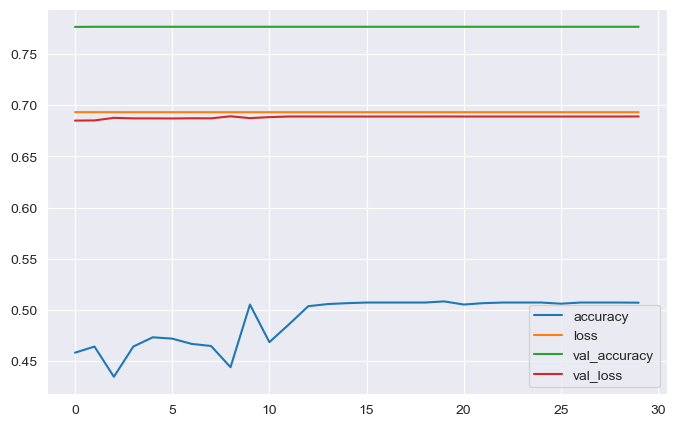

In [42]:
pd.DataFrame(history_6.history).plot(figsize=(8,5))

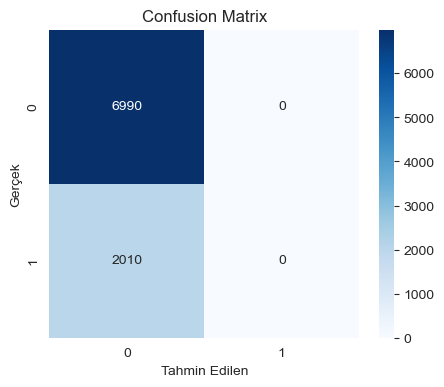

In [43]:
plot_confusion_matrix(y_test,y_pred_6)

### 🧬 seventh Model - Model-7 - Classification

In [44]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_7 = model_7.fit(
    X_train_scaled, y_train,
    epochs=40,
    validation_data=(X_test_scaled, y_test),
    class_weight=class_weight_dict
)

Epoch 1/40
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3805 - loss: 0.6955 - val_accuracy: 0.7767 - val_loss: 0.6869
Epoch 2/40
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6528 - loss: 0.6953 - val_accuracy: 0.7767 - val_loss: 0.6888
Epoch 3/40
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6299 - loss: 0.6953 - val_accuracy: 0.7767 - val_loss: 0.6889
Epoch 4/40
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6262 - loss: 0.6953 - val_accuracy: 0.7767 - val_loss: 0.6889
Epoch 5/40
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6262 - loss: 0.6953 - val_accuracy: 0.7767 - val_loss: 0.6889
Epoch 6/40
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6262 - loss: 0.6953 - val_accuracy: 0.7767 - val_loss: 0.6889
Epoch 7/40
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6262 - loss: 0.6953 - val_accuracy: 0.7767 - val_loss: 0.6889
Epoch 8/40
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6262 - loss: 0.6953 - 

## Model-7 Predict

In [45]:
y_pred_7 = model_7.predict(X_test_scaled)
y_pred_7 = (y_pred_7 > 0.5).astype(int)
y_pred_7

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

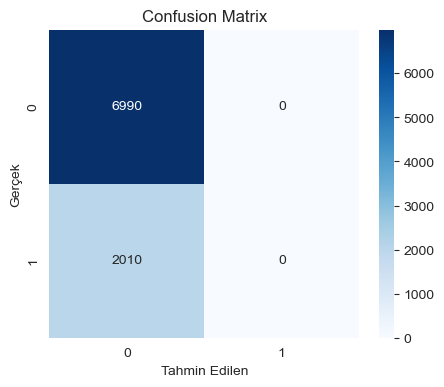

In [46]:
plot_confusion_matrix(y_test,y_pred_7)

### 🧬 eighth Model - Model-8 - Classification

In [47]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])

history_8 = model_8.fit(
    X_train_scaled, y_train,
    epochs=30,
    validation_data=(X_test_scaled, y_test),
    class_weight=class_weight_dict
)

Epoch 1/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7695 - loss: 0.6955 - val_accuracy: 0.7662 - val_loss: 0.6884
Epoch 2/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - accuracy: 0.7059 - loss: 0.6953 - val_accuracy: 0.7313 - val_loss: 0.6903
Epoch 3/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step - accuracy: 0.6284 - loss: 0.6953 - val_accuracy: 0.7062 - val_loss: 0.6909
Epoch 4/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 991us/step - accuracy: 0.5900 - loss: 0.6953 - val_accuracy: 0.6940 - val_loss: 0.6910
Epoch 5/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 977us/step - accuracy: 0.5764 - loss: 0.6953 - val_accuracy: 0.6903 - val_loss: 0.6911
Epoch 6/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - accuracy: 0.5715 - loss: 0.6953 - val_accuracy: 0.6892 - val_loss: 0.6911
Epoch 7/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step - accuracy: 0.5697 - loss: 0.6953 - val_accuracy: 0.6874 - val_loss: 0.6911
Epoch 8/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 994us/step - accuracy: 0.5684 - l

## Model-8 Predict

In [48]:
y_preds_8 = model_8.predict(X_test_scaled)
y_preds_8 = (y_preds_8 > 0.5).astype(int)
y_preds_8

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

<Axes: >

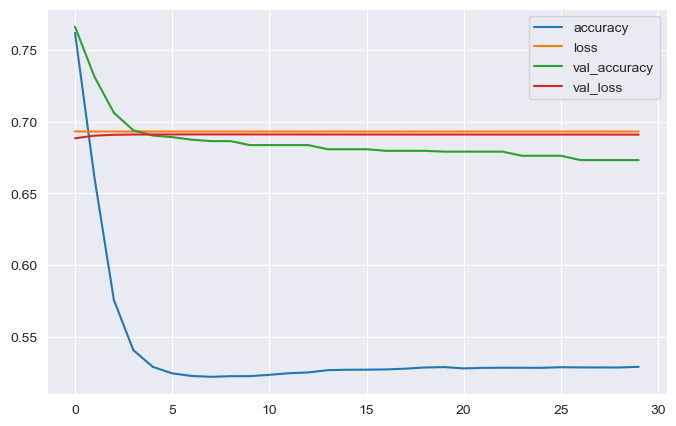

In [49]:
pd.DataFrame(history_8.history).plot(figsize=(8,5))

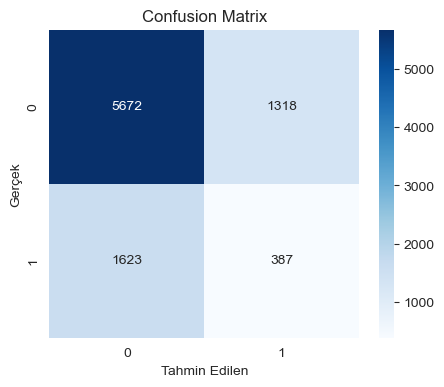

In [50]:
plot_confusion_matrix(y_test,y_preds_8)

### 🧬 ninth Model - Model-9 - Classification

In [51]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history_9 = model_9.fit(
    X_train_scaled, y_train,
    epochs=25,
    validation_data=(X_test_scaled, y_test),
)

Epoch 1/25
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7762 - loss: 0.5432 - val_accuracy: 0.7767 - val_loss: 0.5315
Epoch 2/25
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7762 - loss: 0.5332 - val_accuracy: 0.7767 - val_loss: 0.5313
Epoch 3/25
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7762 - loss: 0.5328 - val_accuracy: 0.7767 - val_loss: 0.5312
Epoch 4/25
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7762 - loss: 0.5326 - val_accuracy: 0.7767 - val_loss: 0.5311
Epoch 5/25
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7762 - loss: 0.5324 - val_accuracy: 0.7767 - val_loss: 0.5310
Epoch 6/25
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7762 - loss: 0.5323 - val_accuracy: 0.7767 - val_loss: 0.5310
Epoch 7/25
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7762 - loss: 0.5323 - val_accuracy: 0.7767 - val_loss: 0.5310
Epoch 8/25
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7762 - loss: 0.5322 - 

## Model-9 Predict

In [52]:
y_preds_9 = model_9.predict(X_test_scaled)
y_preds_9 = (y_preds_9 > 0.5).astype(int)
y_preds_9

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

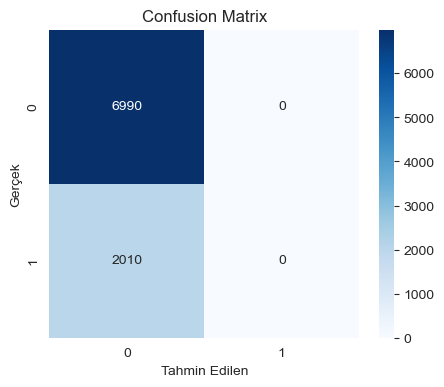

In [53]:
plot_confusion_matrix(y_test,y_preds_9)

### ⚡ We are adding new features to address the imbalance in the dataset and to better teach the model the values of '1'

In [54]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [55]:
data_one_hot = pd.get_dummies(data,dtype=int)
data_one_hot.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_female,...,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,1,...,0,1,0,0,0,0,1,0,1,0
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,1,...,1,0,0,1,0,0,0,0,0,1
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,1,...,0,0,0,0,0,1,0,0,1,0
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,1,...,0,1,0,0,0,1,0,0,1,0
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,0,...,0,1,0,0,0,1,0,0,1,0


In [56]:
X = data_one_hot.drop('loan_status', axis=1)
y= data_one_hot['loan_status']

In [57]:
X

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,person_gender_female,person_gender_male,...,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,0,...,0,1,0,0,0,0,1,0,1,0
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,1,0,...,1,0,0,1,0,0,0,0,0,1
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,0,...,0,0,0,0,0,1,0,0,1,0
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,0,...,0,1,0,0,0,1,0,0,1,0
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,47971.0,6,15000.0,15.66,0.31,3.0,645,0,1,...,0,1,0,0,0,1,0,0,1,0
44996,37.0,65800.0,17,9000.0,14.07,0.14,11.0,621,1,0,...,0,1,0,0,1,0,0,0,1,0
44997,33.0,56942.0,7,2771.0,10.02,0.05,10.0,668,0,1,...,0,1,1,0,0,0,0,0,1,0
44998,29.0,33164.0,4,12000.0,13.23,0.36,6.0,604,0,1,...,0,1,0,1,0,0,0,0,1,0


In [58]:
y

0        1
1        0
2        1
3        1
4        1
        ..
44995    1
44996    1
44997    1
44998    1
44999    1
Name: loan_status, Length: 45000, dtype: int64

In [59]:
#create new training and test data
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.2,random_state=42)

In [60]:
print(f"X_train1 shape: {X_train1.shape}")
print(f"y_train1 shape: {y_train1.shape}")
print(f"X_test1 shape: {X_test1.shape}")
print(f"y_test1 shape: {y_test1.shape}")

X_train1 shape: (36000, 27)
y_train1 shape: (36000,)
X_test1 shape: (9000, 27)
y_test1 shape: (9000,)


### 🧬 first - Model_new_1 - Classification

In [61]:
tf.random.set_seed(42)

model_new_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27,)),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_new_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['accuracy'])

history_new_1 = model_new_1.fit(X_train1,y_train1,epochs=30)

Epoch 1/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - accuracy: 0.7000 - loss: 15.7446
Epoch 2/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - accuracy: 0.7762 - loss: 0.5418
Epoch 3/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 746us/step - accuracy: 0.7762 - loss: 0.5320
Epoch 4/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 759us/step - accuracy: 0.7762 - loss: 0.5317
Epoch 5/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step - accuracy: 0.7762 - loss: 0.5318
Epoch 6/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step - accuracy: 0.7762 - loss: 0.5318
Epoch 7/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 738us/step - accuracy: 0.7762 - loss: 0.5318
Epoch 8/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 739us/step - accuracy: 0.7762 - loss: 0.5318
Epoch 9/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 751us/step - accuracy: 0.7762 - loss: 0.5318
Epoch 10/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step - accuracy: 0.7762 - loss: 0.5318
Epoch 11/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - accuracy: 0.7762 - loss: 0.5318
Epoch 1

<Axes: >

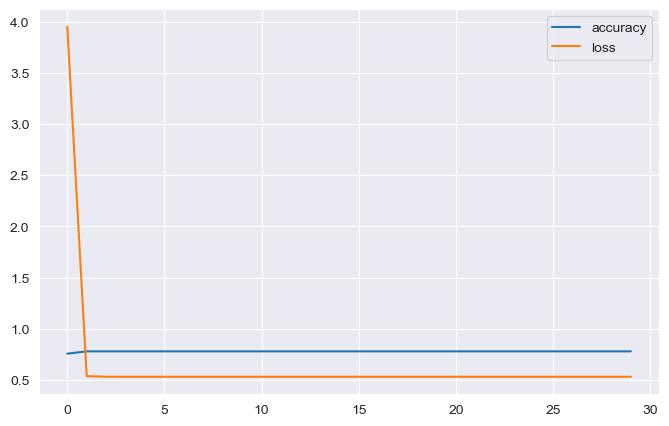

In [62]:
pd.DataFrame(history_new_1.history).plot(figsize=(8,5))

### Model_new_1 Predict

In [63]:
y_preds_new_1 = model_new_1.predict(X_test1)
y_preds_new_1 = (y_preds_new_1 > 0.5).astype(int)
y_preds_new_1

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

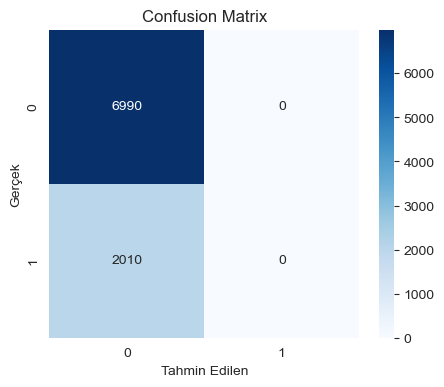

In [64]:
plot_confusion_matrix(y_test1,y_preds_new_1)

## Preprocessing data (normalization and standardization)


In [65]:
from sklearn.preprocessing import StandardScaler
scaler      = StandardScaler()
X_train_new_sc  = scaler.fit_transform(X_train1)
X_test_new_sc   = scaler.transform(X_test1)

## Weight

In [66]:
from sklearn.utils.class_weight import compute_class_weight

classes = np.array([0,1])
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train1.astype(int)
)

class_weight_dict = dict(zip(classes,class_weights))
print(class_weight_dict)

{np.int64(0): np.float64(0.6426276329882185), np.int64(1): np.float64(2.252816020025031)}


### 🧬 Second - Model_new_2 - Classification


In [67]:
tf.random.set_seed(42)

model_new_2 = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(27,)),
  tf.keras.layers.Flatten(),
    
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_new_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=["accuracy"])

history_new_2 = model_new_2.fit(X_train_new_sc,y_train,epochs=70,class_weight=class_weight_dict)

Epoch 1/70
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8028 - loss: 0.3407
Epoch 2/70
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8728 - loss: 0.2361
Epoch 3/70
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8777 - loss: 0.2256
Epoch 4/70
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8806 - loss: 0.2200
Epoch 5/70
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8832 - loss: 0.2154
Epoch 6/70
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8823 - loss: 0.2130
Epoch 7/70
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8846 - loss: 0.2103
Epoch 8/70
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8843 - loss: 0.2104
Epoch 9/70
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8832 - loss: 0.2070
Epoch 10/70
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8898 - loss: 0.2027
Epoch 11/70
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8887 - loss: 0.2010
Epoch 12/70
1125/1125 ━━━━━━━━

In [68]:
model_new_2.evaluate(X_test_new_sc,y_test)

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.8902 - loss: 0.3959


[0.41722309589385986, 0.8874444365501404]

## model_new_2 Predict

In [69]:
y_preds_new_2 = model_new_2.predict(X_test_new_sc)
y_preds_new_2 = (y_preds_new_2 > 0.5).astype(int)
y_preds_new_2

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step


array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [1]])

<Axes: >

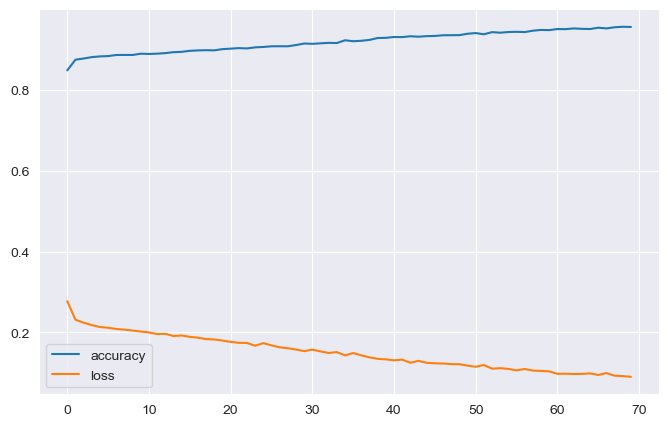

In [70]:
pd.DataFrame(history_new_2.history).plot(figsize=(8,5))

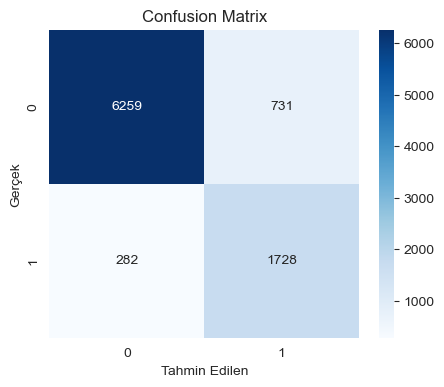

In [71]:
plot_confusion_matrix(y_test1,y_preds_new_2)

In [72]:
X_train1.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,person_gender_female,person_gender_male,...,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
25180,34.0,97265.0,11,15000.0,12.73,0.15,9.0,631,1,0,...,0,0,0,0,0,0,1,0,1,0
12555,25.0,72953.0,3,12000.0,11.86,0.16,4.0,659,0,1,...,0,1,0,0,0,0,0,1,0,1
29153,41.0,322597.0,18,24000.0,10.37,0.07,11.0,683,1,0,...,0,0,0,0,0,0,1,0,0,1
23838,27.0,94232.0,4,9600.0,17.14,0.10,7.0,641,0,1,...,0,1,0,1,0,0,0,0,1,0
35686,27.0,84873.0,7,7059.0,12.97,0.08,3.0,706,0,1,...,0,1,0,0,1,0,0,0,0,1


In [73]:
print(X_train1.columns.tolist())


['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'person_gender_female', 'person_gender_male', 'person_education_Associate', 'person_education_Bachelor', 'person_education_Doctorate', 'person_education_High School', 'person_education_Master', 'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'previous_loan_defaults_on_file_No', 'previous_loan_defaults_on_file_Yes']


In [74]:
X_test1.iloc[25]

person_age                               29.00
person_income                         60991.00
person_emp_exp                            6.00
loan_amnt                             13650.00
loan_int_rate                            10.99
loan_percent_income                       0.22
cb_person_cred_hist_length                9.00
credit_score                            626.00
person_gender_female                      1.00
person_gender_male                        0.00
person_education_Associate                0.00
person_education_Bachelor                 0.00
person_education_Doctorate                0.00
person_education_High School              0.00
person_education_Master                   1.00
person_home_ownership_MORTGAGE            1.00
person_home_ownership_OTHER               0.00
person_home_ownership_OWN                 0.00
person_home_ownership_RENT                0.00
loan_intent_DEBTCONSOLIDATION             0.00
loan_intent_EDUCATION                     0.00
loan_intent_H

In [75]:
y_test1.iloc[25]

np.int64(0)

In [76]:
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [77]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    # Sayısal özellikler
    (MinMaxScaler(), [
        "person_age",
        "person_income",
        "person_emp_exp",
        "loan_amnt",
        "loan_int_rate",
        "loan_percent_income",
        "cb_person_cred_hist_length",
        "credit_score"
    ]),
    # Kategorik özellikler
    (OneHotEncoder(handle_unknown="ignore"), [
        "person_gender",
        "person_education",
        "person_home_ownership",
        "loan_intent",
        "previous_loan_defaults_on_file"
    ])
)

# create X & y
X = data.drop("loan_status", axis=1)
y = data["loan_status"]

#build our train and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

#Fit column transformer on the training data only
ct.fit(X_train2)

X_train_normalized = ct.transform(X_train2)
X_test_normalized = ct.transform(X_test2)

In [78]:
X_train2.loc[0]


person_age                            22.0
person_gender                       female
person_education                    Master
person_income                      71948.0
person_emp_exp                           0
person_home_ownership                 RENT
loan_amnt                          35000.0
loan_intent                       PERSONAL
loan_int_rate                        16.02
loan_percent_income                   0.49
cb_person_cred_hist_length             3.0
credit_score                           561
previous_loan_defaults_on_file          No
Name: 0, dtype: object

In [79]:
X_train_normalized[0]


array([0.11290323, 0.01241039, 0.088     , 0.42028986, 0.50137174,
       0.23809524, 0.25      , 0.52391304, 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       1.        , 0.        ])

In [80]:
X_train_normalized.shape,X_train2.shape


((36000, 27), (36000, 13))

### 🧬 Third - Model_new_3 - Classification

In [81]:
tf.random.set_seed(42)

model_new_3 = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(27,)),
  tf.keras.layers.Flatten(),
    
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_new_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=["accuracy"])

history_new_3 = model_new_3.fit(X_train_normalized,y_train2,epochs=70,class_weight=class_weight_dict)

Epoch 1/70
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7782 - loss: 0.5150
Epoch 2/70
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8635 - loss: 0.3608
Epoch 3/70
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8669 - loss: 0.3060
Epoch 4/70
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8745 - loss: 0.2768
Epoch 5/70
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8790 - loss: 0.2593
Epoch 6/70
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8835 - loss: 0.2487
Epoch 7/70
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8851 - loss: 0.2396
Epoch 8/70
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8871 - loss: 0.2368
Epoch 9/70
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8868 - loss: 0.2312
Epoch 10/70
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8888 - loss: 0.2278
Epoch 11/70
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8886 - loss: 0.2254
Epoch 12/70
1125/1125 ━━━━━━━━

In [82]:
model_new_3.evaluate(X_test_normalized,y_test2)

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 0.8903 - loss: 0.2357


[0.24440063536167145, 0.8915555477142334]

<Axes: >

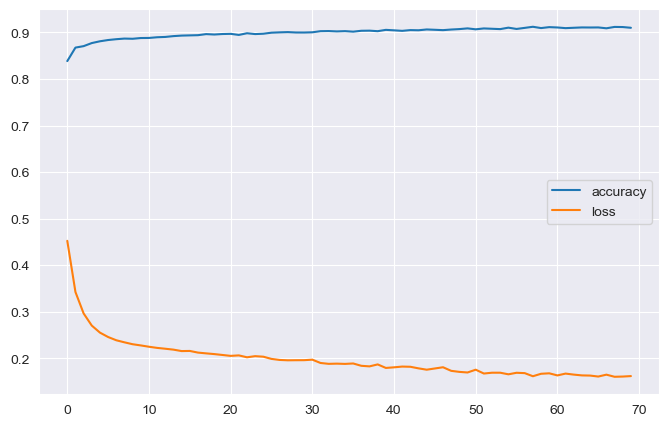

In [83]:
pd.DataFrame(history_new_3.history).plot(figsize=(8,5))

## Model_new_3 Predict

In [84]:
y_preds_new_3 = model_new_3.predict(X_test_normalized)
y_preds_new_3 = (y_preds_new_3 > 0.5).astype(int)
y_preds_new_3

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step


array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]])

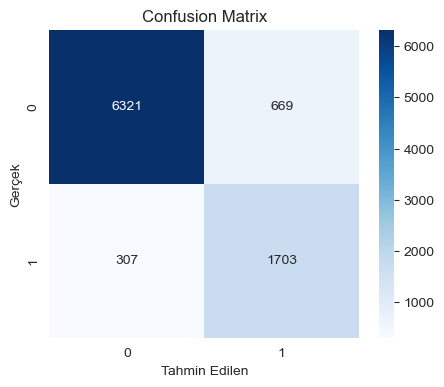

In [85]:
plot_confusion_matrix(y_test2,y_preds_new_3)

In [86]:
idx = X_test2.index[2]   # örneğin test set’ten 7. örnek

# 3) O satırı ham haliyle alın:
row_raw    = X_test2.loc[[idx]]            # DataFrame, shape (1, n_features)
actual     = y_test2.loc[idx]                  # gerçek credit_score

# 4) Transformer ile dönüştürün:
row_transf = ct.transform(row_raw)            # shape (1, n_transformed_features)

# 5) Modelden tahmin alın:
predicted  = model_new_3.predict(row_transf).squeeze()
predicted  = (predicted > 0.5).astype(int)

# 6) Karşılaştırın:
print(f"Seçilen indeks: {idx}")
print(f"Gerçek credit_score:    {actual}")
print(f"Tahmin edilen credit_score: {predicted:.2f}")
print(f"Hata (pred–real):       {predicted - actual:+.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Seçilen indeks: 43386
Gerçek credit_score:    1
Tahmin edilen credit_score: 1.00
Hata (pred–real):       +0.00


### ✔ Save Model

In [87]:
tf.keras.models.save_model(model_new_3, "loan_status_model.h5",overwrite=True)

In [88]:
tf.keras.models.save_model(model_new_3, "loan_status_model.keras",overwrite=True)